In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)
study = flotilla.embark('singlecell_pnm_figure1_post_kmeans_outliers', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
folder = 'figures/001_modality_calculation_bayesian'
! mkdir $folder

2017-01-13 06:50:49	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_post_kmeans_outliers/datapackage.json
2017-01-13 06:50:49	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-13 06:52:03 	Initializing Study
2017-01-13 06:52:03 	Initializing Predictor configuration manager for Study
2017-01-13 06:52:03	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-13 06:52:03	Added ExtraTreesClassifier to default predictors
2017-01-13 06:52:03	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-13 06:52:03	Added ExtraTreesRegressor to default predictors
2017-01-13 06:52:03	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-13 06:52:03	Added GradientBoostingClassifier to default predictors
2017-01-13 06:52:03	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-13 06:52:03	Added GradientBoostingRegressor to default predictors
2017-01-13 06:52:03 	Loading metadata
2017-01-13 06:52:03	Loading expression data
2017-0

In [2]:
# study.plot_event("CDC42")

In [3]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]
print splicing_singles_no_outliers.shape

(276, 17978)


## Estimate modalities

### Initialize the modality estimator

In [4]:
import anchor

bayesian = anchor.BayesianModalities()
# binned = anchor.BinnedModalities()
# monte_carlo = anchor.MonteCarloModalities()

In [5]:
# fig = estimator.violinplot(n=1e6)
# for ax in fig.axes:
#     ax.set(yticks=[0, 0.5, 1], xlabel='')
# fig.tight_layout()
# sns.despine()
# fig.savefig('{}/modality_estimator_parameterized_family.pdf'.format(folder))

## Calculate/Estimate modalities only on single cells, with no outliers

And at least 10 cells per splicing event, per celltype/phenotype

In [6]:
study.splicing.minimum_samples

10

In [7]:
print splicing_singles_no_outliers.shape
splicing_singles_no_outliers = splicing_singles_no_outliers.groupby(
    study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=study.splicing.minimum_samples, axis=1))
print splicing_singles_no_outliers.shape

(276, 17978)
(276, 13799)


In [ ]:
pkm_events = study.splicing.maybe_renamed_to_feature_id('PKM')

In [ ]:
%time modality_assignments = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).apply(bayesian.fit_predict)

In [22]:
modality_assignments

,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@exon:chr10:101514286-101514391:+@junction:chr10:101514392-101515381:+,isoform1=junction:chr10:101510154-101514285:+|isoform2=junction:chr10:101510154-101513352:+@novel_exon:chr10:101513353-101513445:+@junction:chr10:101513446-101514285:+,isoform1=junction:chr10:101995522-101997778:-|isoform2=junction:chr10:101996727-101997778:-@exon:chr10:101996607-101996726:-@junction:chr10:101995522-101996606:-,isoform1=junction:chr10:101996727-102003454:-|isoform2=junction:chr10:101997989-102003454:-@exon:chr10:101997779-101997988:-@junction:chr10:101996727-101997778:-,isoform1=junction:chr10:102006693-102013177:-|isoform2=junction:chr10:102010090-102013177:-@exon:chr10:102010005-102010089:-@junction:chr10:102006693-102010004:-,...,isoform1=junction:chrY:21897637-21903203:-|isoform2=junction:chrY:21901549-21903203:-@exon:chrY:21901414-21901548:-@junction:chrY:21897637-21901413:-,isoform1=junction:chrY:21901549-21903620:-|isoform2=junction:chrY:21903375-21903620:-@exon:chrY:21903204-21903374:-@junction:chrY:21901549-21903203:-,isoform1=junction:chrY:22744580-22749909:+|isoform2=junction:chrY:22744580-22746359:+@exon:chrY:22746360-22746410:+@junction:chrY:22746411-22749909:+,isoform1=junction:chrY:2709669-2712117:+|isoform2=junction:chrY:2709669-2710205:+@exon:chrY:2710206-2710283:+@junction:chrY:2710284-2712117:+,isoform1=junction:chrY:2710284-2713686:+|isoform2=junction:chrY:2710284-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2713686:+,isoform1=junction:chrY:2712299-2722640:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2722640:+,isoform1=junction:chrY:2713785-2722640:+|isoform2=junction:chrY:2713785-2721709:+@novel_exon:chrY:2721710-2721732:+@junction:chrY:2721733-2722640:+,isoform1=junction:chrY:2713785-2733128:+|isoform2=junction:chrY:2713785-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2733128:+,isoform1=junction:chrY:2722813-2734833:+|isoform2=junction:chrY:2722813-2733128:+@exon:chrY:2733129-2733286:+@junction:chrY:2733287-2734833:+,isoform1=junction:chrY:2822039-2843135:+|isoform2=junction:chrY:2822039-2829114:+@exon:chrY:2829115-2829687:+@junction:chrY:2829688-2843135:+
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,NaN,NaN,included,bimodal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,included,included,included,excluded,included,included,NaN
NPC,NaN,NaN,included,bimodal,bimodal,NaN,excluded,bimodal,NaN,NaN,...,NaN,NaN,included,included,included,included,excluded,included,included,NaN
iPSC,bimodal,bimodal,included,included,bimodal,included,excluded,included,included,included,...,bimodal,bimodal,included,included,included,included,excluded,included,included,bimodal


In [23]:
modalities_tidy = modality_assignments.stack().reset_index()
modalities_tidy = modalities_tidy.rename(columns={'level_1': 'event_id', 0: "modality",})
modalities_tidy.head()

,phenotype,event_id,modality
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,included
1,MN,isoform1=junction:chr10:101476219-101480743:-|...,bimodal
2,MN,isoform1=junction:chr10:102114390-102120490:+|...,included
3,MN,isoform1=junction:chr10:102283687-102286731:-|...,included
4,MN,isoform1=junction:chr10:102746733-102747069:-|...,bimodal


In [24]:
modalities_tidy.loc[modalities_tidy.event_id.isin(pkm_events)]

,phenotype,event_id,modality
1651,MN,isoform1=junction:chr15:72492997-72499068:-|is...,included
1652,MN,isoform1=junction:chr15:72492997-72499068:-|is...,included
1653,MN,isoform1=junction:chr15:72494962-72499068:-@ex...,bimodal
1654,MN,isoform1=junction:chr15:72511452-72523456:-|is...,excluded
8968,NPC,isoform1=junction:chr15:72492997-72499068:-|is...,included
8969,NPC,isoform1=junction:chr15:72492997-72499068:-|is...,included
8970,NPC,isoform1=junction:chr15:72494962-72499068:-@ex...,excluded
8971,NPC,isoform1=junction:chr15:72511452-72523456:-|is...,excluded
19192,iPSC,isoform1=junction:chr15:72492997-72499068:-|is...,included
19193,iPSC,isoform1=junction:chr15:72494962-72499068:-@ex...,excluded


In [25]:
modalities_counts = modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1235
1,MN,excluded,2216
2,MN,included,3137
3,MN,uncategorized,9
4,NPC,bimodal,1910


In [26]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [27]:
modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,3725.0,2970.0,2216.0
bimodal,2679.0,1910.0,1235.0
included,6182.0,4514.0,3137.0
middle,1.0,NaN,NaN
uncategorized,74.0,20.0,9.0


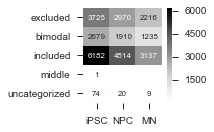

In [28]:
fig, ax= plt.subplots(figsize=(3, 2))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=8), cmap='Greys')
ax.set(xlabel='', ylabel='')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

In [29]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1235,18.720631
1,MN,excluded,2216,33.591026
2,MN,included,3137,47.551918
3,MN,uncategorized,9,0.136426
4,NPC,bimodal,1910,20.288931
5,NPC,excluded,2970,31.548757
6,NPC,included,4514,47.949862
7,NPC,uncategorized,20,0.212450
8,iPSC,bimodal,2679,21.159466
9,iPSC,excluded,3725,29.421057


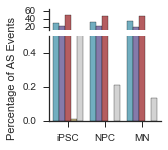

In [30]:
sns.set(style='ticks')
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 2), gridspec_kw=dict(hspace=0.1, height_ratios=[0.2, 0.8]))

ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax, bottom=True)
ax.tick_params(axis='x', bottom='off')
ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='') #yticks=[10, 50, ])

ax = axes[1]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
           hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.set(ylim=(0, 0.5), ylabel='Percentage of AS Events', 
       xlabel='')
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

In [31]:
study.supplemental.modalities_tidy = modalities_tidy

In [ ]:
modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1235
           excluded         2216
           included         3137
           uncategorized       9
NPC        bimodal          1910
           excluded         2970
           included         4514
           uncategorized      20
iPSC       bimodal          2679
           excluded         3725
           included         6182
           middle              1
           uncategorized      74
dtype: int64

In [ ]:
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study.save('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)